## Introducción

### Objetivo de la Tarea

El objetivo de esta tarea es aplicar diferentes algoritmos de **aprendizaje supervisado** en el conjunto de datos **Titanic**, utilizando herramientas de la librería **scikit-learn**. El propósito principal es construir modelos predictivos para determinar si un pasajero del Titanic sobrevivió o no, basándose en las características disponibles del pasajero, como su clase de boleto, género, edad, entre otros factores.

En este análisis, se evaluarán los siguientes métodos supervisados:

- **Naive Bayes**: Un clasificador probabilístico que asume la independencia entre características.
- **Análisis Discriminante Lineal**: Un método de clasificación que maximiza la separación entre las clases mediante una combinación lineal de características.
- **Regresión Logística**: Un modelo lineal utilizado para predecir la probabilidad de un evento binario, en este caso, la supervivencia de los pasajeros.

### Descripción del Conjunto de Datos

El conjunto de datos **Titanic** se puede obtener utilizando la función `fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)` de la librería `scikit-learn`. Este dataset incluye información sobre **1,309 pasajeros** del Titanic y sus características relevantes para el análisis, tales como:

- Clase del boleto (1ra, 2da, 3ra clase)
- Género
- Edad
- Número de familiares a bordo
- Tarifa pagada
- Punto de embarque

El objetivo es predecir la variable **"survived"** (0 = no sobrevivió, 1 = sobrevivió).

Además, se investigará si la **edad** es un factor determinante para la supervivencia y se intentará predecir el destino de dos pasajeros con información incompleta.

### Metodología

El análisis que se llevará a cabo incluirá las siguientes etapas:

1. **Exploración de Datos:** Exploración de las características del dataset, identificación de valores faltantes y distribución de las variables.
2. **Ingeniería de Características:** Transformaciones de los datos, incluyendo imputación de valores nulos, codificación de variables categóricas y normalización de características numéricas.
3. **Aplicación de Algoritmos Supervisados:**
   - **Naive Bayes**
   - **Análisis Discriminante Lineal**
   - **Regresión Logística**
4. **Análisis Específico de la Edad:** Se investigará si la edad es un factor determinante en la supervivencia.
5. **Predicción del Destino de Dos Pasajeros:** Se intentará predecir el destino de dos pasajeros con información incompleta en el dataset.
6. **Evaluación de Modelos:** Se utilizarán métricas como **precisión**, **recall**, **matriz de confusión** y **ROC-AUC** para evaluar el rendimiento de los modelos.
7. **Conclusiones:** Se resumirán los resultados clave del análisis, incluyendo la importancia de la edad como factor de supervivencia.



## Descripción de las Columnas del Dataset Titanic

El dataset Titanic contiene 1,309 entradas (pasajeros) y 14 columnas. A continuación se describe cada columna, su tipo de dato y la cantidad de valores no nulos:

| **Columna**  | **Descripción** | **Tipo de Dato** | **Valores no nulos** |
|--------------|-----------------|------------------|----------------------|
| `pclass`     | Clase del boleto del pasajero (1ra, 2da, 3ra clase) | `int64` | 1309/1309 |
| `name`       | Nombre del pasajero | `object` | 1309/1309 |
| `sex`        | Género del pasajero (male/female) | `category` | 1309/1309 |
| `age`        | Edad del pasajero | `float64` | 1046/1309 |
| `sibsp`      | Número de hermanos/cónyuge a bordo | `int64` | 1309/1309 |
| `parch`      | Número de padres/hijos a bordo | `int64` | 1309/1309 |
| `ticket`     | Número del boleto | `object` | 1309/1309 |
| `fare`       | Tarifa pagada por el pasajero | `float64` | 1308/1309 |
| `cabin`      | Número de la cabina del pasajero | `object` | 295/1309 |
| `embarked`   | Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton) | `category` | 1307/1309 |
| `boat`       | Número del bote salvavidas asignado al pasajero | `object` | 486/1309 |
| `body`       | Número de identificación del cuerpo recuperado (si aplica) | `float64` | 121/1309 |
| `home.dest`  | Destino final del pasajero | `object` | 745/1309 |
| `survived`   | Indicador de supervivencia (0 = no sobrevivió, 1 = sobrevivió) | `category` | 1309/1309 |

### Tipos de Datos:
- **Categorías:** `sex`, `embarked`, y `survived` están representados como categorías.
- **Valores faltantes:** Las columnas `age`, `fare`, `cabin`, `embarked`, `boat`, `body` y `home.dest` contienen valores nulos que podrían requerir imputación o eliminación según su relevancia en el análisis.

### Resumen:
- **Variables numéricas:** `age`, `sibsp`, `parch`, `fare`, `body` (aunque esta última contiene principalmente valores nulos).
- **Variables categóricas:** `sex`, `embarked`, `survived`.
- **Variables con datos faltantes:** La columna `age` tiene aproximadamente un 20% de valores nulos, y las columnas `cabin` y `body` tienen una gran cantidad de valores faltantes, lo que podría ser relevante para su tratamiento en el análisis posterior.




### ***Librerias***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# 1. Exploración de Datos (EDA)

## 1.1 Carga de los datos

Cargamos el dataset y verificamos la estructura de los datos.

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Cargar el dataset Titanic
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Mostrar las primeras filas del dataset
df_titanic = X.copy()
df_titanic['survived'] = y  # Agregar la variable objetivo 'survived'
df_titanic.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


## 1.2 Revisamos la información del Dataset

Revisamos los tipos de datos y la cantidad de valores nulos para determinar si necesitamos imputar o eliminar valores faltantes.

In [3]:
# Información general sobre el dataset
df_titanic.info()

# Revisar la cantidad de valores nulos por columna
df_titanic.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

## 1.3 Estadísticas Descriptivas

Calculamos estadísticas básicas para las variables numéricas, como la edad y la tarifa, para obtener una visión general de su distribución.

In [4]:
df_titanic.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
pclass,1309.000000,2.294882,0.837836,1.000000,2.000000,3.000000,3.000000,3.000000
age,1046.000000,29.881135,14.413500,0.166700,21.000000,28.000000,39.000000,80.000000
sibsp,1309.000000,0.498854,1.041658,0.000000,0.000000,0.000000,1.000000,8.000000
parch,1309.000000,0.385027,0.865560,0.000000,0.000000,0.000000,0.000000,9.000000
fare,1308.000000,33.295479,51.758668,0.000000,7.895800,14.454200,31.275000,512.329200
body,121.000000,160.809917,97.696922,1.000000,72.000000,155.000000,256.000000,328.000000


## 1.4. Distribución de la variable objetivo (survived):

Visualizamos la distribución de la variable objetivo (survived) para entender el equilibrio entre las clases (supervivientes y no supervivientes).

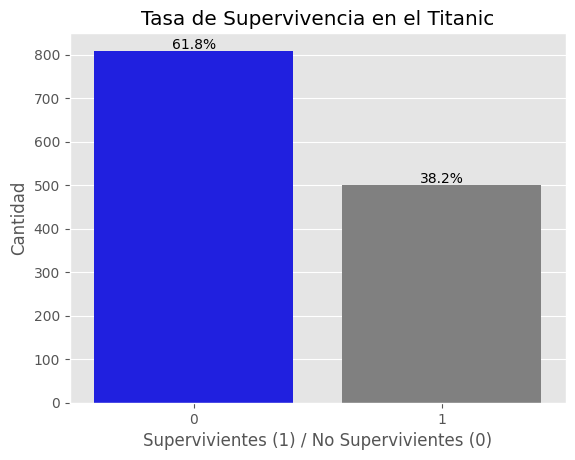

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Distribución de la variable 'survived'
ax = sns.countplot(x='survived', data=df_titanic, hue='survived', palette=['blue', 'grey'], legend=False)
plt.title('Tasa de Supervivencia en el Titanic')  # Título más informativo
plt.xlabel('Supervivientes (1) / No Supervivientes (0)')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y

# Añadir porcentaje en cada barra
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height/len(df_titanic)*100), (x + width/2, y + height + 5), ha='center')

plt.show()

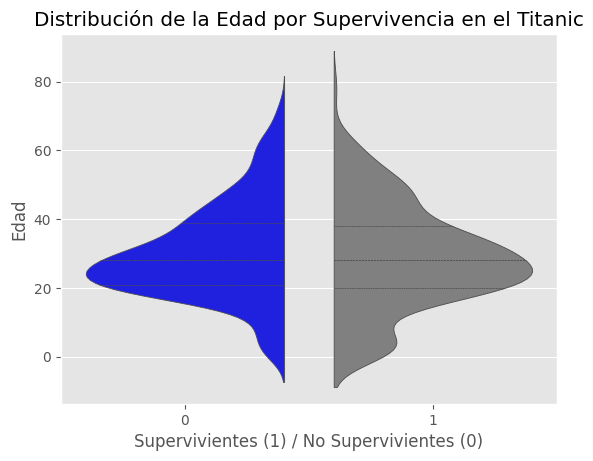

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Gráfico de violín
sns.violinplot(x='survived', y='age', data=df_titanic, hue='survived', palette=['blue', 'grey'], split=True, inner="quartile")
plt.title('Distribución de la Edad por Supervivencia en el Titanic')
plt.xlabel('Supervivientes (1) / No Supervivientes (0)')
plt.ylabel('Edad')

plt.show()

## Interpretación del Gráfico de Violín

El gráfico de violín muestra la distribución de la edad de los pasajeros del Titanic, separada por aquellos que sobrevivieron (1) y aquellos que no sobrevivieron (0). Cada violín representa la distribución de la edad en cada grupo:

* **Supervivientes (1):** El violín azul muestra que la distribución de la edad de los supervivientes se concentra en edades más bajas, con un pico alrededor de los 20 años. También hay una concentración menor alrededor de los 40 años. La forma del violín sugiere una distribución ligeramente sesgada hacia la derecha.

* **No Supervivientes (0):** El violín gris muestra que la distribución de la edad de los no supervivientes es más amplia y se extiende hacia edades más altas, con un pico alrededor de los 30 años. La forma del violín sugiere una distribución más simétrica.

## Conclusiones

* **Relación entre la edad y la supervivencia:** El gráfico muestra una clara relación entre la edad y la probabilidad de supervivencia en el Titanic. Los niños y los jóvenes adultos tenían una mayor probabilidad de sobrevivir.

* **Mayor concentración de edades bajas entre los supervivientes:** La distribución de la edad de los supervivientes está concentrada en edades más bajas que la distribución de los no supervivientes.

* **Distribución de la edad más amplia entre los no supervivientes:** La distribución de la edad de los no supervivientes es más amplia, lo que sugiere que personas de diferentes edades tenían una probabilidad de no sobrevivir.

## Puntos adicionales a considerar

* **Presencia de datos atípicos:** No se puede apreciar la presencia de datos atípicos en este gráfico.

* **Contexto del naufragio:** La interpretación del gráfico debe tener en cuenta el contexto histórico del naufragio del Titanic. Factores como la clase social y la ubicación en el barco también influyeron en la supervivencia.

## Resumen

En resumen, el gráfico de violín muestra una relación clara entre la edad y la supervivencia en el Titanic, destacando una mayor concentración de edades bajas entre los supervivientes y una distribución de la edad más amplia entre los no supervivientes.

Calcular la matriz de correlación

In [9]:

df_titanic['survived'] = df_titanic['survived'].astype('int64')

In [10]:
# Seleccionar solo las columnas numéricas
df_numeric = df_titanic.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación usando solo las variables numéricas
correlation_matrix = df_numeric.corr()

# Correlación de las variables con la variable objetivo 'survived'
correlation_survived = correlation_matrix['survived'].sort_values(ascending=False)
print(correlation_survived)

survived    1.000000
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055513
pclass     -0.312469
body             NaN
Name: survived, dtype: float64


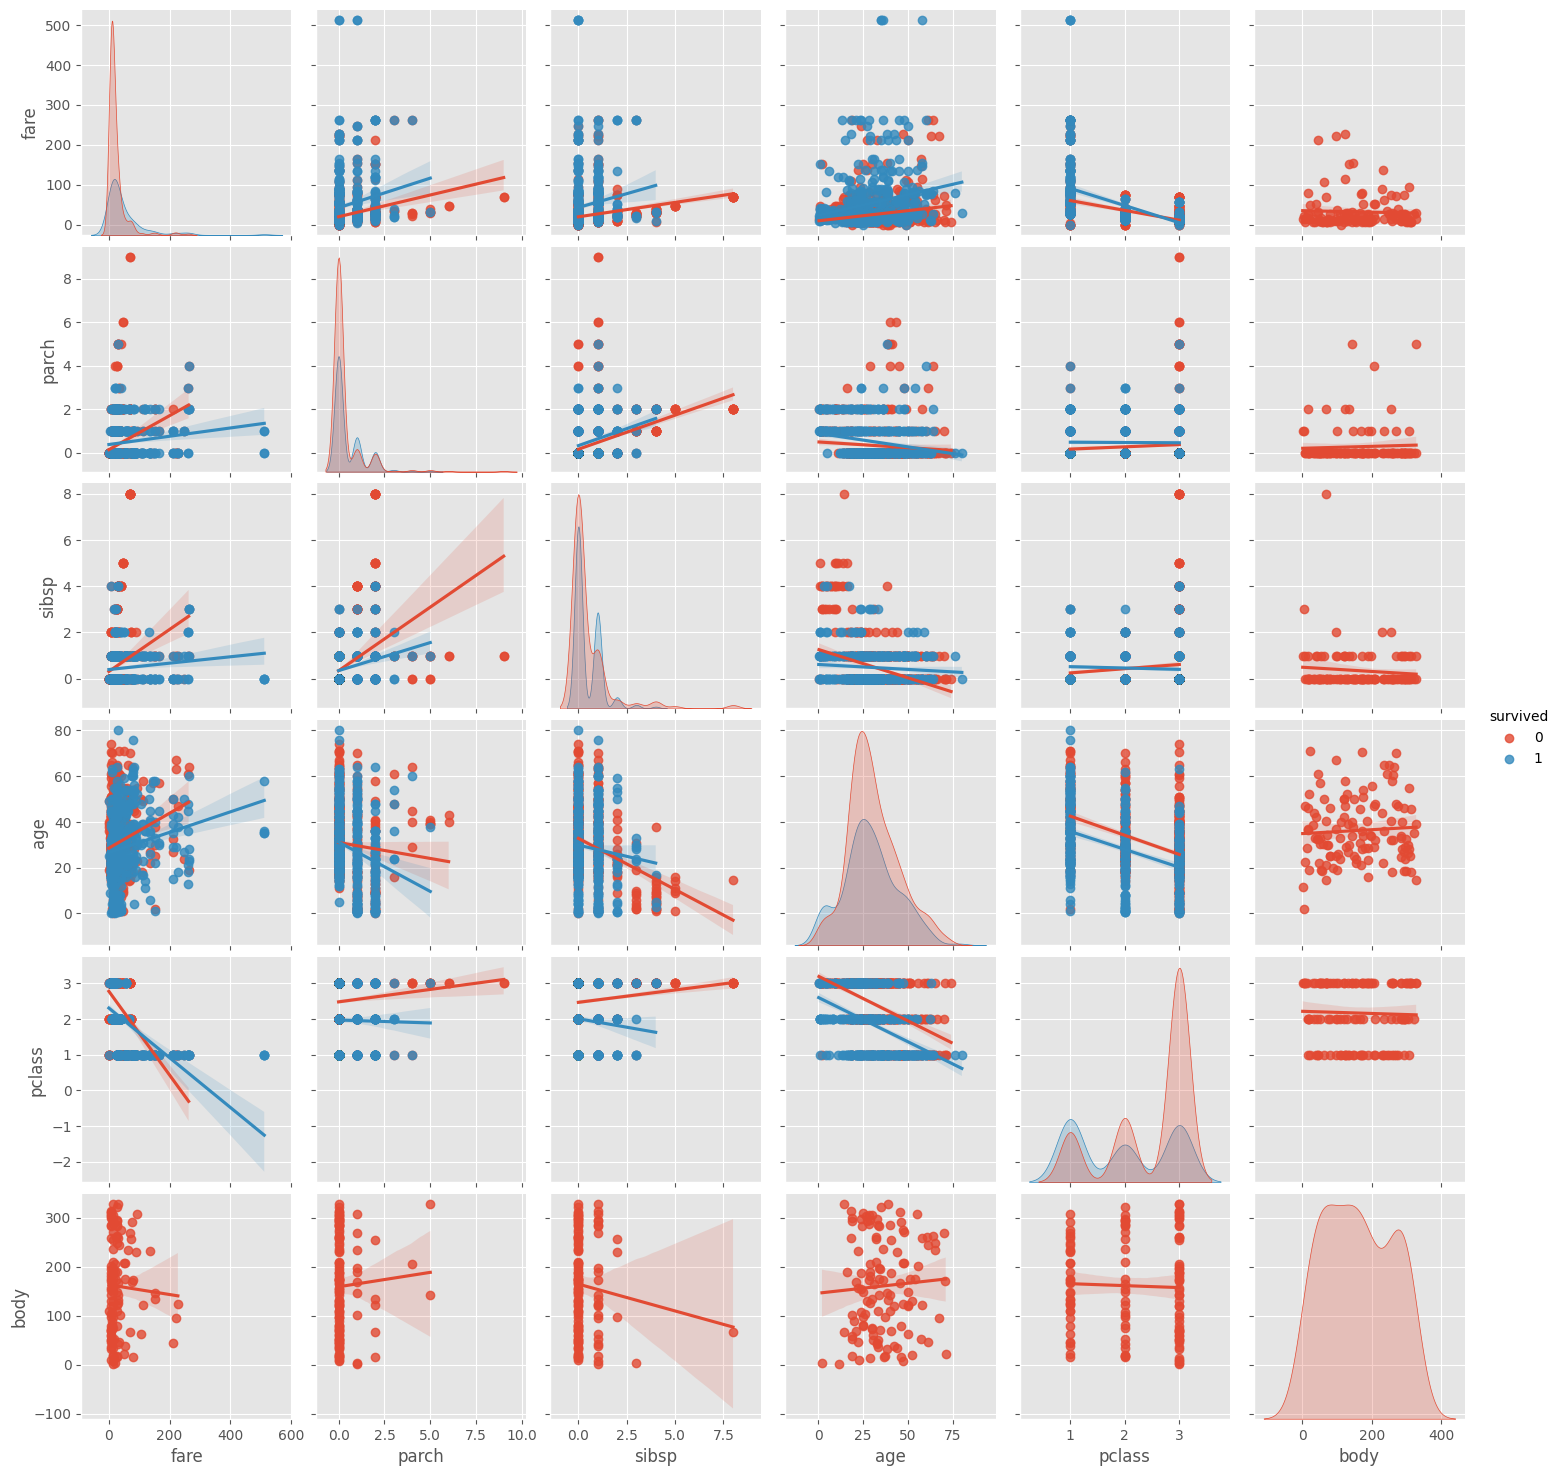

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# Seleccionar las variables más correlacionadas con 'target'
selected_features = ['fare', 'parch', 'sibsp', 'age', 'pclass', 'body', 'survived']

# Crear un nuevo DataFrame con las variables seleccionadas
df_selected = df_numeric[selected_features]

# Generar el pairplot simplificado
sns.pairplot(df_selected, hue='survived', kind='reg', diag_kind='kde')
plt.show()

## 1.5 Tratamiento Valores Faltantes

Columnas con valores faltantes:

1. `age` (263 valores faltantes)
2. `fare` (1 valor faltante)
3. `cabin` (1014 valores faltantes)
4. `embarked` (2 valores faltantes)
5. `boat` (823 valores faltantes)
6. `body` (1188 valores faltantes)
7. `home.dest` (564 valores faltantes)

1. Columna `age`:

Dado que la edad puede ser una variable importante para la predicción de la supervivencia, utilizamos la media o la mediana para imputar los valores faltantes. La media es sensible a outliers, así que la mediana es a menudo una opción más robusta.

2. Columna `fare`:

Como solo falta un valor, podemos imputarlo fácilmente con la media o mediana.

3. Columna `cabin`:

La columna cabin tiene una gran cantidad de valores faltantes (1014 de 1309). Dado que esta variable probablemente tiene poca información útil, podemos eliminarla del análisis o crear una nueva variable que simplemente indique si el número de cabina es conocido o no.

4. Columna `embarked`:

Con solo dos valores faltantes, podemos imputar esta variable con el valor más común (la moda).

5. Columna `boat`:

Esta columna tiene una gran cantidad de valores faltantes, pero podría ser informativa. Se podría convertir en una variable binaria indicando si el pasajero tenía o no asignado un bote.

6. Columna `body`:

La columna body tiene una gran cantidad de valores nulos, ya que solo está completada para los pasajeros que fallecieron y cuyos cuerpos fueron recuperados (121 valores no nulos de 1309).

Imputar con 0 o NaN según el análisis: Dado que los valores nulos en body indican que el cuerpo no fue recuperado o que el pasajero sobrevivió, podemos optar por imputar los valores faltantes con un número 0 (indicando que no hay identificación de cuerpo). De esta manera, mantendremos la columna pero simplificamos el análisis.

7. Columna `home.dest`:

Esta columna describe el destino final de los pasajeros, pero tiene 564 valores nulos de 1309. Sin embargo, podría darnos una idea del contexto socioeconómico o el lugar de origen de los pasajeros, lo que puede ser relevante para las predicciones.

Imputar con una categoría 'Unknown': Dado que los valores faltantes representan pasajeros cuyo destino final no está documentado, podemos crear una nueva categoría llamada Unknown para los valores nulos.

In [12]:
# Imputar los valores faltantes de 'age' con la mediana
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].median())

# Imputar el valor faltante de 'fare' con la mediana
df_titanic['fare'] = df_titanic['fare'].fillna(df_titanic['fare'].median())

# Crear una nueva columna indicando si la cabina es conocida o no, y eliminar 'cabin'
df_titanic['cabin_known'] = df_titanic['cabin'].notnull().astype(int)
df_titanic.drop(columns='cabin', inplace=True)

# Imputar los valores faltantes de 'embarked' con la moda
df_titanic['embarked'] = df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0])

# Crear una nueva columna indicando si el pasajero tenía un bote asignado, y eliminar 'boat'
df_titanic['has_boat'] = df_titanic['boat'].notnull().astype(int)
df_titanic.drop(columns='boat', inplace=True)

# Imputar los valores faltantes de 'body' con 0
df_titanic['body'] = df_titanic['body'].fillna(0)

# Imputar los valores faltantes de 'home.dest' con 'Unknown'
df_titanic['home.dest'] = df_titanic['home.dest'].fillna('Unknown')


In [13]:
# Seleccionar solo las columnas numéricas nuevamente después de imputar 'body'
df_numeric = df_titanic.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación usando solo las variables numéricas
correlation_matrix = df_numeric.corr()

# Correlación de las variables con la variable objetivo 'survived'
correlation_survived = correlation_matrix['survived'].sort_values(ascending=False)
print(correlation_survived)

survived       1.000000
has_boat       0.948190
cabin_known    0.302250
fare           0.244414
parch          0.082660
sibsp         -0.027825
age           -0.043818
body          -0.211795
pclass        -0.312469
Name: survived, dtype: float64


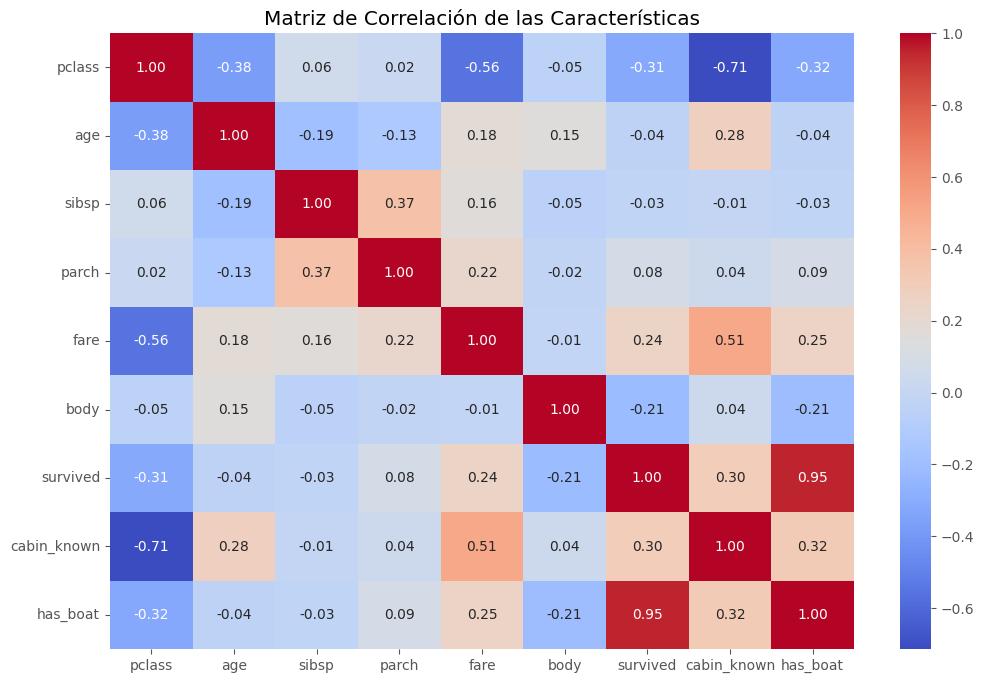

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Mapa de calor de la correlación con anotaciones
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matriz de Correlación de las Características')
plt.show()


## Interpretación de la Matriz de Correlación

A continuación se presenta una interpretación del mapa de calor de la matriz de correlación que muestra las relaciones entre las características numéricas del dataset Titanic.

### 1. **Correlaciones más destacadas con la variable objetivo `survived`:**
- **`has_boat` (0.95):** Existe una correlación muy fuerte entre la variable `has_boat` y la supervivencia. Esto indica que los pasajeros que tenían un bote asignado tenían una alta probabilidad de sobrevivir, lo cual es lógico, ya que el acceso a un bote fue crucial para la supervivencia.
  
- **`cabin_known` (0.30):** Los pasajeros que tenían cabina asignada también tenían una mayor probabilidad de supervivencia. Esto podría estar relacionado con el hecho de que los pasajeros de clases más altas (que pagaron más) tenían cabinas asignadas, y estos pasajeros tenían más posibilidades de sobrevivir.

- **`fare` (0.24):** Existe una correlación positiva entre la tarifa pagada y la supervivencia, lo que sugiere que los pasajeros que pagaron más (generalmente de clases superiores) tenían una mayor probabilidad de sobrevivir.

- **`pclass` (-0.31):** Existe una correlación negativa entre la clase del pasajero (`pclass`) y la supervivencia. Los pasajeros de primera clase tenían más probabilidades de sobrevivir, mientras que los de tercera clase tenían menos probabilidades.

### 2. **Relaciones entre características:**
- **`pclass` y `fare` (-0.56):** Existe una fuerte correlación negativa entre la clase de boleto y la tarifa. Esto refleja que los pasajeros de clases superiores pagaron tarifas más altas.
  
- **`cabin_known` y `pclass` (-0.71):** Existe una correlación negativa considerable entre tener una cabina asignada y la clase de boleto. Los pasajeros de primera clase tenían más probabilidades de tener una cabina asignada en comparación con los pasajeros de tercera clase.

- **`fare` y `cabin_known` (0.51):** Esta correlación indica que los pasajeros que pagaron tarifas más altas también tenían más probabilidades de tener una cabina asignada, lo que refuerza la relación entre la clase socioeconómica y la supervivencia.

- **`parch` y `sibsp` (0.37):** Existe una correlación moderada entre el número de padres/hijos a bordo (`parch`) y el número de hermanos/cónyuge a bordo (`sibsp`). Esto sugiere que muchos pasajeros viajaban con miembros de su familia.

### 3. **Variables con baja correlación con la supervivencia:**
- **`age` (-0.04):** La edad tiene una correlación muy baja con la supervivencia, lo que sugiere que, en promedio, la edad del pasajero no fue un factor determinante para predecir la supervivencia.
  
- **`sibsp` (-0.03) y `parch` (0.08):** Estas variables que indican si el pasajero viajaba con familiares no muestran una fuerte correlación con la supervivencia. Viajar con familiares no parece haber sido un factor decisivo para sobrevivir.

- **`body` (-0.21):** Aunque la variable `body` tiene una correlación negativa con la supervivencia, su relevancia es limitada porque se refiere solo a aquellos pasajeros que no sobrevivieron y cuyos cuerpos fueron recuperados.

### Conclusiones:
- Los factores más fuertemente correlacionados con la supervivencia son **`has_boat`**, **`cabin_known`**, y **`fare`**, lo que indica que el acceso a un bote salvavidas, tener una cabina asignada y pagar tarifas más altas fueron factores clave para la supervivencia.
- Las variables relacionadas con la clase social, como **`pclass`** y **`fare`**, están fuertemente correlacionadas entre sí y también muestran una relación considerable con la supervivencia.
- Las variables relacionadas con la familia, como **`sibsp`** y **`parch`**, así como la **edad**, parecen tener un impacto menor en la probabilidad de supervivencia.



# 2. Ingeniería de Características

## 2.1 Normalización de las características

En este paso, nos centraremos en la codificación de las variables categóricas y evaluaremos si es necesario aplicar normalización o alguna otra transformación a las variables numéricas.

1. Codificación de Variables Categóricas (Encoding)

* Las variables categóricas no pueden ser interpretadas directamente por la mayoría de los algoritmos de machine learning. Por lo tanto, necesitamos transformarlas en valores numéricos. Vamos a utilizar One-Hot Encoding para las variables categóricas con más de dos categorías, y Label Encoding para las variables binarias.

* Variables categóricas identificadas:

    * sex: Binaria (Male/Female), se puede aplicar Label Encoding.
    * embarked: Tiene tres categorías (C, Q, S), utilizaremos One-Hot Encoding.
    * home.dest: La hemos imputado con 'Unknown' y podemos aplicar One-Hot Encoding si lo consideramos útil.

Implementación del encoding:

In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Codificar la variable 'sex' con Label Encoding (Male = 1, Female = 0)
df_titanic['sex'] = df_titanic['sex'].map({'male': 1, 'female': 0})

# Aplicar One-Hot Encoding a las variables 'embarked' y 'home.dest'
df_titanic = pd.get_dummies(df_titanic, columns=['embarked', 'home.dest'], drop_first=True)

# Verificar los cambios
df_titanic.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,body,survived,...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,0.0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,0.0,1,...,False,False,False,False,False,False,False,False,False,False
2,1,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,0.0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,135.0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,0.0,0,...,False,False,False,False,False,False,False,False,False,False


2. Normalización de Variables Numéricas

Algunas variables numéricas, como fare (tarifa) y age (edad), pueden tener rangos muy diferentes. Para ciertos algoritmos (por ejemplo, Regresión Logística, Análisis Discriminante), es recomendable normalizar o escalar las variables numéricas para que todas tengan un rango similar.

Normalización consiste en escalar las variables para que sus valores queden entre 0 y 1.

Implementación de la normalización:

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Variables numéricas a normalizar
numerical_cols = ['age', 'fare']

# Aplicar la normalización a las columnas numéricas
df_titanic[numerical_cols] = scaler.fit_transform(df_titanic[numerical_cols])

# Verificar los cambios
df_titanic.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,body,survived,...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,1,"Allen, Miss. Elisabeth Walton",0,0.361169,0,0,24160,0.412503,0.0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,"Allison, Master. Hudson Trevor",1,0.009395,1,2,113781,0.295806,0.0,1,...,False,False,False,False,False,False,False,False,False,False
2,1,"Allison, Miss. Helen Loraine",0,0.022964,1,2,113781,0.295806,0.0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,"Allison, Mr. Hudson Joshua Creighton",1,0.373695,1,2,113781,0.295806,135.0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,0.311064,1,2,113781,0.295806,0.0,0,...,False,False,False,False,False,False,False,False,False,False


3. Revisión Final y Verificación de Cambios

Revisamos si hemos aplicado correctamente todas las transformaciones y si las variables están listas para ser utilizadas en los algoritmos de machine learning.

In [17]:
# Revisar los tipos de datos después del encoding y normalización
df_titanic.info()

# Revisar el resumen estadístico para asegurarse de que la normalización fue aplicada correctamente
df_titanic.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 383 entries, pclass to home.dest_Zurich, Switzerland
dtypes: bool(371), category(1), float64(3), int64(6), object(2)
memory usage: 588.3+ KB


,pclass,age,sibsp,parch,fare,body,survived,cabin_known,has_boat
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.367472,0.498854,0.385027,0.064960,14.864782,0.381971,0.225363,0.371276
std,0.837836,0.161652,1.041658,0.865560,0.100993,55.197471,0.486055,0.417981,0.483331
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.273486,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.348643,0.000000,0.000000,0.028213,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.436325,1.000000,0.000000,0.061045,0.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,8.000000,9.000000,1.000000,328.000000,1.000000,1.000000,1.000000


# 3. Aplicación de Algoritmos Supervisados

## 3.1 Naive Bayes

Naive Bayes es un algoritmo rápido y eficiente que se basa en la asunción de independencia entre características.